# Pandas Fundamentals II - Part 3: Handling Missing Values

## Week 3, Day 1 (Wednesday) - April 23rd, 2025

### Overview
This is the third part of our Pandas Fundamentals II session, focusing on handling missing values. Missing data is a common challenge in real-world datasets, and properly identifying and addressing these gaps is crucial for accurate analysis.

### Learning Objectives
- Understand how Pandas represents missing values
- Learn various methods to detect missing data
- Master different strategies for handling missing values
- Apply appropriate techniques based on the nature of the data
- Understand the implications of different missing data handling approaches

### Prerequisites
- Python fundamentals (Week 1)
- Pandas Fundamentals I (Week 2, Day 2)
- Indexing and Selection (Week 3, Part 1)
- Filtering Data (Week 3, Part 2)

## 1. Introduction to Missing Data in Pandas

Missing data is represented in Pandas primarily in two ways:
1. `NaN` (Not a Number) - Used for numeric data and is part of the NumPy library
2. `None` - Python's built-in object for representing missing data

Let's create a dataset with missing values to explore different handling techniques:

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a sample DataFrame with missing values
data = {
    'customer_id': ['C001', 'C002', 'C003', 'C004', 'C005', 'C006', 'C007', 'C008'],
    'name': ['John Smith', 'Emily Davis', 'Michael Johnson', None, 'Sarah Wilson', 'David Brown', None, 'Lisa Anderson'],
    'age': [28, 34, np.nan, 45, 31, np.nan, 39, 42],
    'email': ['john@example.com', None, 'michael@example.com', 'robert@example.com', None, 'david@example.com', 'james@example.com', 'lisa@example.com'],
    'purchases': [5, 12, 8, np.nan, 15, 7, 3, np.nan],
    'last_purchase_date': [pd.Timestamp('2025-01-15'), pd.Timestamp('2025-02-20'), None, pd.Timestamp('2025-01-30'), pd.Timestamp('2025-03-05'), None, pd.Timestamp('2025-02-10'), pd.Timestamp('2025-03-15')],
    'loyalty_score': [4.5, 3.8, 4.2, None, 4.9, 3.2, None, 4.7]
}

# Create DataFrame
customers_df = pd.DataFrame(data)

print("Sample Customer DataFrame with Missing Values:")
customers_df

Sample Customer DataFrame with Missing Values:


,customer_id,name,age,email,purchases,last_purchase_date,loyalty_score
0,C001,John Smith,28.0,john@example.com,5.0,2025-01-15,4.5
1,C002,Emily Davis,34.0,None,12.0,2025-02-20,3.8
2,C003,Michael Johnson,NaN,michael@example.com,8.0,NaT,4.2
3,C004,None,45.0,robert@example.com,NaN,2025-01-30,NaN
4,C005,Sarah Wilson,31.0,None,15.0,2025-03-05,4.9
5,C006,David Brown,NaN,david@example.com,7.0,NaT,3.2
6,C007,None,39.0,james@example.com,3.0,2025-02-10,NaN
7,C008,Lisa Anderson,42.0,lisa@example.com,NaN,2025-03-15,4.7


## 2. Detecting Missing Values



Before handling missing values, we need to detect them. Pandas provides several methods to identify missing data:

In [2]:
# Check for missing values with .isna() or .isnull() (they're identical)
missing_values = customers_df.isna()
print("Boolean mask of missing values:")
print(missing_values)


Boolean mask of missing values:
   customer_id   name    age  email  purchases  last_purchase_date  \
0        False  False  False  False      False               False   
1        False  False  False   True      False               False   
2        False  False   True  False      False                True   
3        False   True  False  False       True               False   
4        False  False  False   True      False               False   
5        False  False   True  False      False                True   
6        False   True  False  False      False               False   
7        False  False  False  False       True               False   

   loyalty_score  
0          False  
1          False  
2          False  
3           True  
4          False  
5          False  
6           True  
7          False  


In [3]:

# Count missing values in each column
missing_count = customers_df.isna().sum()
print("\nCount of missing values per column:")
print(missing_count)



Count of missing values per column:
customer_id           0
name                  2
age                   2
email                 2
purchases             2
last_purchase_date    2
loyalty_score         2
dtype: int64


In [5]:

# Check for rows with any missing values
rows_with_missing = customers_df[customers_df.isna().any(axis=1)]
print("\nRows with at least one missing value:")
rows_with_missing



Rows with at least one missing value:


,customer_id,name,age,email,purchases,last_purchase_date,loyalty_score
1,C002,Emily Davis,34.0,None,12.0,2025-02-20,3.8
2,C003,Michael Johnson,NaN,michael@example.com,8.0,NaT,4.2
3,C004,None,45.0,robert@example.com,NaN,2025-01-30,NaN
4,C005,Sarah Wilson,31.0,None,15.0,2025-03-05,4.9
5,C006,David Brown,NaN,david@example.com,7.0,NaT,3.2
6,C007,None,39.0,james@example.com,3.0,2025-02-10,NaN
7,C008,Lisa Anderson,42.0,lisa@example.com,NaN,2025-03-15,4.7


In [6]:

# Calculate percentage of missing values per column
percent_missing = customers_df.isna().mean() * 100
print("\nPercentage of missing values per column:")
percent_missing


Percentage of missing values per column:


customer_id            0.0
name                  25.0
age                   25.0
email                 25.0
purchases             25.0
last_purchase_date    25.0
loyalty_score         25.0
dtype: float64

### Visualizing Missing Data

It can be helpful to visualize missing data patterns:

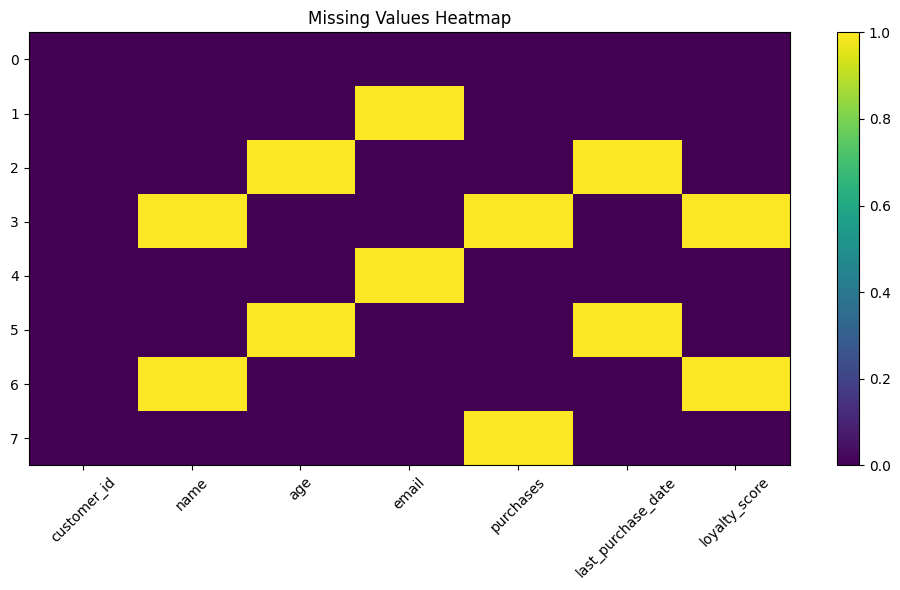

In [7]:
# Create a heatmap of missing values
plt.figure(figsize=(10, 6))
plt.imshow(customers_df.isna(), cmap='viridis', aspect='auto')
plt.colorbar()
plt.xticks(range(len(customers_df.columns)), customers_df.columns, rotation=45)
plt.yticks(range(len(customers_df)), customers_df.index)
plt.title('Missing Values Heatmap')
plt.tight_layout()
plt.show()


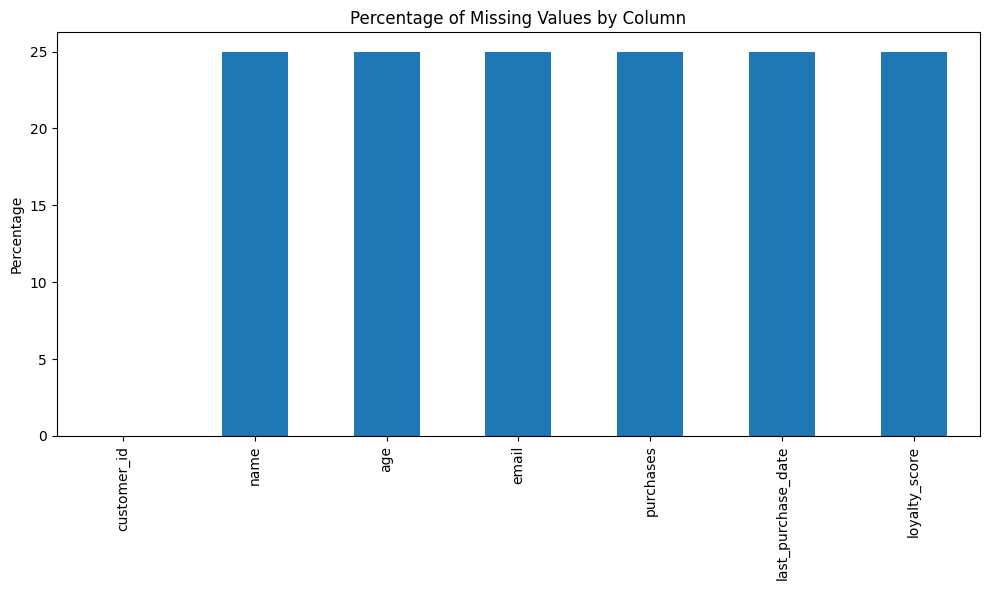

In [8]:

# Plot percentage of missing values per column
plt.figure(figsize=(10, 6))
percent_missing.plot(kind='bar')
plt.title('Percentage of Missing Values by Column')
plt.ylabel('Percentage')
plt.tight_layout()
plt.show()

## 3. Understanding Types of Missing Data



Missing data can be categorized into three types:

1. **Missing Completely at Random (MCAR):** The probability of missing is the same for all observations
2. **Missing at Random (MAR):** The probability of missing depends on observed data
3. **Missing Not at Random (MNAR):** The probability of missing depends on unobserved data

Understanding the type of missing data helps determine the appropriate handling strategy.

## 4. Handling Missing Values: Deletion Methods



One approach to handling missing data is to delete rows or columns with missing values. This is appropriate when missing data is minimal or when the missing data is MCAR.

In [10]:
# Create a copy of the DataFrame to avoid modifying the original
df_copy = customers_df.copy()


In [11]:

# Drop rows with any missing values (listwise deletion)
df_dropna_rows = df_copy.dropna()
print("DataFrame after dropping rows with missing values:")
print(df_dropna_rows)
print(f"Original shape: {df_copy.shape}, New shape: {df_dropna_rows.shape}")


DataFrame after dropping rows with missing values:
  customer_id        name   age             email  purchases  \
0        C001  John Smith  28.0  john@example.com        5.0   

  last_purchase_date  loyalty_score  
0         2025-01-15            4.5  
Original shape: (8, 7), New shape: (1, 7)


In [12]:

# Drop rows only if all columns are missing (rarely used)
df_dropna_all = df_copy.dropna(how='all')
print("\nDataFrame after dropping rows where all values are missing:")
print(f"Original shape: {df_copy.shape}, New shape: {df_dropna_all.shape}")



DataFrame after dropping rows where all values are missing:
Original shape: (8, 7), New shape: (8, 7)


In [15]:

# Drop rows with missing values in specific columns
df_dropna_subset = df_copy.dropna(subset=['name', 'email'])
print("\nDataFrame after dropping rows with missing 'name' or 'email':")
print(df_dropna_subset)
customers_df



DataFrame after dropping rows with missing 'name' or 'email':
  customer_id             name   age                email  purchases  \
0        C001       John Smith  28.0     john@example.com        5.0   
2        C003  Michael Johnson   NaN  michael@example.com        8.0   
5        C006      David Brown   NaN    david@example.com        7.0   
7        C008    Lisa Anderson  42.0     lisa@example.com        NaN   

  last_purchase_date  loyalty_score  
0         2025-01-15            4.5  
2                NaT            4.2  
5                NaT            3.2  
7         2025-03-15            4.7  


,customer_id,name,age,email,purchases,last_purchase_date,loyalty_score
0,C001,John Smith,28.0,john@example.com,5.0,2025-01-15,4.5
1,C002,Emily Davis,34.0,None,12.0,2025-02-20,3.8
2,C003,Michael Johnson,NaN,michael@example.com,8.0,NaT,4.2
3,C004,None,45.0,robert@example.com,NaN,2025-01-30,NaN
4,C005,Sarah Wilson,31.0,None,15.0,2025-03-05,4.9
5,C006,David Brown,NaN,david@example.com,7.0,NaT,3.2
6,C007,None,39.0,james@example.com,3.0,2025-02-10,NaN
7,C008,Lisa Anderson,42.0,lisa@example.com,NaN,2025-03-15,4.7


In [21]:

# Drop columns with missing values
df_dropna_cols = df_copy.dropna(axis=1)
print("\nDataFrame after dropping columns with any missing values:")
print(df_dropna_cols)


DataFrame after dropping columns with any missing values:
  customer_id
0        C001
1        C002
2        C003
3        C004
4        C005
5        C006
6        C007
7        C008


### When to use deletion methods:

- **Pros:**
  - Simple and quick to implement
  - No risk of introducing bias if data is MCAR
  - Ensures complete cases for analyses that require them
  
- **Cons:**
  - Can significantly reduce sample size
  - May introduce bias if data is MAR or MNAR
  - Wasteful of potentially useful data

## 5. Handling Missing Values: Imputation Methods



Imputation involves replacing missing values with estimated values. There are several methods for imputation:

In [ ]:
# 1. Fill with a specific value
df_fill_specific = customers_df.copy()
df_fill_specific['age'] = df_fill_specific['age'].fillna(0)
df_fill_specific['name'] = df_fill_specific['name'].fillna('Unknown')
print("DataFrame after filling specific values:")
print(df_fill_specific[['name', 'age']])

# 2. Fill with statistical measures
df_fill_stats = customers_df.copy()
df_fill_stats['age'] = df_fill_stats['age'].fillna(df_fill_stats['age'].mean())  # Mean
df_fill_stats['purchases'] = df_fill_stats['purchases'].fillna(df_fill_stats['purchases'].median())  # Median
df_fill_stats['loyalty_score'] = df_fill_stats['loyalty_score'].fillna(df_fill_stats['loyalty_score'].mode()[0])  # Mode
print("\nDataFrame after filling with statistical measures:")
print(df_fill_stats[['age', 'purchases', 'loyalty_score']])

In [ ]:
# 3. Forward fill (uses previous valid value)
df_ffill = customers_df.copy().sort_values('customer_id').reset_index(drop=True)
df_ffill_result = df_ffill.fillna(method='ffill')
print("DataFrame after forward fill:")
print(df_ffill_result)

# 4. Backward fill (uses next valid value)
df_bfill_result = df_ffill.fillna(method='bfill')
print("\nDataFrame after backward fill:")
print(df_bfill_result)

In [ ]:
# 5. Interpolation (linear, polynomial, etc.)
# First create a DataFrame with time series data that has missing values
dates = pd.date_range('2025-01-01', periods=10, freq='D')
values = [10, 11, np.nan, np.nan, 15, 16, np.nan, 19, np.nan, 22]
time_series = pd.Series(values, index=dates)

print("Original time series with missing values:")
print(time_series)

# Linear interpolation
linear_interp = time_series.interpolate(method='linear')
print("\nTime series after linear interpolation:")
print(linear_interp)

# Polynomial interpolation
poly_interp = time_series.interpolate(method='polynomial', order=2)
print("\nTime series after polynomial interpolation:")
print(poly_interp)

# Plot the different interpolation methods
plt.figure(figsize=(12, 6))
time_series.plot(marker='o', linestyle='none', label='Original Data', ax=plt.gca())
linear_interp.plot(marker='.', label='Linear Interpolation', ax=plt.gca())
poly_interp.plot(marker='.', label='Polynomial Interpolation', ax=plt.gca())
plt.title('Comparison of Interpolation Methods')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# 6. Fill missing values based on groups
# Create a DataFrame with customer segments
customer_data = {
    'customer_id': ['C001', 'C002', 'C003', 'C004', 'C005', 'C006', 'C007', 'C008'],
    'segment': ['Premium', 'Standard', 'Premium', 'Standard', 'Premium', 'Standard', 'Premium', 'Standard'],
    'spending': [1500, 600, np.nan, 450, 1800, np.nan, 1200, 500]
}
segment_df = pd.DataFrame(customer_data)

print("Customer segment data with missing values:")
print(segment_df)

# Group by segment and fill missing values with group mean
segment_means = segment_df.groupby('segment')['spending'].transform('mean')
segment_df['spending_filled'] = segment_df['spending'].fillna(segment_means)

print("\nAfter filling with segment means:")
print(segment_df)

# Show the group means
print("\nSegment means:")
print(segment_df.groupby('segment')['spending'].mean())

### When to use imputation methods:

- **Pros:**
  - Preserves sample size
  - Can handle both MCAR and MAR data
  - Multiple techniques available for different data types
  
- **Cons:**
  - Can introduce bias if not done carefully
  - May distort distribution and relationships between variables
  - Some methods can be computationally intensive

## 6. Handling Missing Values in Different Data Types



Different data types require different approaches to handle missing values:

In [ ]:
# Create a DataFrame with different data types
mixed_data = {
    'id': [1, 2, 3, 4, 5],
    'numeric': [10.5, np.nan, 15.7, 8.2, np.nan],
    'categorical': ['A', 'B', None, 'A', None],
    'date': [pd.Timestamp('2025-01-15'), None, pd.Timestamp('2025-02-20'), None, pd.Timestamp('2025-03-10')],
    'boolean': [True, False, None, True, np.nan]
}
mixed_df = pd.DataFrame(mixed_data)

print("Mixed data types with missing values:")
print(mixed_df)
print("\nData types:")
print(mixed_df.dtypes)

In [ ]:
# 1. Handling missing numeric values
mixed_df['numeric_filled'] = mixed_df['numeric'].fillna(mixed_df['numeric'].mean())

# 2. Handling missing categorical values
mixed_df['categorical_filled'] = mixed_df['categorical'].fillna('Unknown')

# 3. Handling missing date values
mixed_df['date_filled'] = mixed_df['date'].fillna(pd.Timestamp('2025-01-01'))

# 4. Handling missing boolean values
mixed_df['boolean_filled'] = mixed_df['boolean'].fillna(False)  # Filling with False

print("DataFrame after type-specific handling:")
print(mixed_df)

## 7. Advanced Techniques: Indicator Variables



Sometimes, the fact that a value is missing can be informative. In such cases, we can create indicator variables to track which values were originally missing:

In [ ]:
# Create indicator variables
df_indicator = customers_df.copy()

# Create an indicator for missing ages
df_indicator['age_missing'] = df_indicator['age'].isna()

# Fill missing age values with mean
df_indicator['age'] = df_indicator['age'].fillna(df_indicator['age'].mean())

print("DataFrame with indicator variable:")
print(df_indicator[['customer_id', 'age', 'age_missing']])

## 8. Advanced Techniques: Multiple Imputation



Multiple imputation involves creating multiple complete datasets with different imputed values, analyzing each dataset, and then combining the results. This accounts for the uncertainty in imputation.

While a full implementation is beyond the scope of this lesson, here's a conceptual example using `scikit-learn`'s `IterativeImputer`:

In [ ]:
# Conceptual example of multiple imputation
'''
from sklearn.experimental import enable_iterative_imputer  # Needed for IterativeImputer
from sklearn.impute import IterativeImputer
import numpy as np

# Extract numeric columns for imputation
numeric_cols = ['age', 'purchases', 'loyalty_score']
numeric_data = customers_df[numeric_cols].values

# Create imputer
imputer = IterativeImputer(max_iter=10, random_state=0)
imputed_data = imputer.fit_transform(numeric_data)

# Create DataFrame with imputed values
imputed_df = customers_df.copy()
imputed_df[numeric_cols] = imputed_data

print("Original DataFrame (numeric columns only):")
print(customers_df[numeric_cols])

print("\nImputed DataFrame (numeric columns only):")
print(imputed_df[numeric_cols])
'''

## 9. Best Practices for Handling Missing Data

1. **Understand the nature of your missing data**
   - Investigate why data is missing (MCAR, MAR, or MNAR)
   - Document missing data patterns

2. **Choose appropriate methods based on data type and analysis goals**
   - For simple exploratory analysis, simple imputation may suffice
   - For more complex analysis, consider multiple imputation or more sophisticated techniques

3. **Use multiple approaches and compare results**
   - Sensitivity analysis: compare different imputation methods
   - Validate results by creating artificial missing data in complete datasets

4. **Document your missing data handling approach**
   - Transparency about how missing data was handled is important for reproducibility
   - Acknowledge limitations of your approach

## 10. SQL Comparison to Pandas Missing Data Handling

In SQL, handling missing values is typically done using `NULL` values and functions like `COALESCE`. Here's a comparison between SQL and Pandas techniques:

| SQL Operation | Pandas Equivalent |
|--------------|-------------------|
| `SELECT * FROM table WHERE column IS NULL` | `df[df['column'].isna()]` |
| `SELECT * FROM table WHERE column IS NOT NULL` | `df[df['column'].notna()]` |
| `COALESCE(column, 0)` | `df['column'].fillna(0)` |
| `COALESCE(column, AVG(column) OVER())` | `df['column'].fillna(df['column'].mean())` |
| `DELETE FROM table WHERE column IS NULL` | `df.dropna(subset=['column'])` |
| `COUNT(column)` (counts non-NULL values) | `df['column'].count()` |
| `COUNT(*)` (counts all rows) | `len(df)` |

## 11. Practice Exercises

### Exercise 1: Detecting Missing Values
Calculate the percentage of missing values for each row in the `customers_df` DataFrame.

In [ ]:
# Your code here

### Exercise 2: Filling Missing Values
Fill the missing values in the `customers_df` DataFrame with appropriate values for each column:
- 'name': 'Unknown Customer'
- 'age': The median age
- 'email': '{customer_id}@example.com'
- 'purchases': 0
- 'last_purchase_date': The current date
- 'loyalty_score': The mean loyalty score

In [ ]:
# Your code here

### Exercise 3: Missing Data Analysis
Find if there's a relationship between missing age values and missing loyalty scores in the `customers_df` DataFrame (i.e., do records that have missing ages also tend to have missing loyalty scores?).

In [ ]:
# Your code here

### Exercise 4: SQL to Pandas Translation
Translate the following SQL query to Pandas code:
```sql
SELECT 
    customer_id, 
    COALESCE(name, 'Unknown') as name,
    COALESCE(age, (SELECT AVG(age) FROM customers)) as age,
    email
FROM customers
WHERE email IS NOT NULL
```

In [ ]:
# Your code here

### Exercise 5: Advanced Missing Data Handling
Create a new DataFrame that:
1. Removes customers who have more than 3 missing values
2. For the remaining customers, fills missing values using forward fill where possible
3. For any values still missing, uses the mean for numeric columns and 'Unknown' for string columns

In [ ]:
# Your code here

## Next Steps

With indexing, filtering, and handling missing values covered, you now have a solid foundation in Pandas data manipulation. In the next sessions, we'll explore advanced Pandas operations including GroupBy, merging, and pivoting data.

Next week, we'll move on to Data Transformation techniques which will further enhance your data preprocessing capabilities.